In [1]:
import time 
import numpy as np
import pandas as pd
import random
import math



def sim_taxi_Furthest(lambda1, lambda2, aban1, aban2, time_coef, T):

#     lambda1 = 1
#     lambda2 = 1.2
#     aban1 = 1
#     aban2 = 1
#     time_coef = 1
#     T = 100 #termination

    NumC_aban = 0 # keep track of the total number of customer leave without being served.
    
    total_utilization = 0 # this varialbe calculate the total utilation of all taxi.
    total_taxi = 0 # the area under the taxis arrival graph (red graph).
    total_customer = 0
    
    
    
    total_throughput = 0

    
    #event calendar vector of 3
    EC = [0,0,0] # explain each entry: 1st entry is taxi arrival, 2nd customer arrival and 3rd entry is termination time.


    #event types
    # 1st entry: is the event type, 2nd entry: is the ID of a taxi, 3rd entry: is the ID of customer
    # list grow as simulation changes. 
    ET = [[0,0,0],
         [0,0,0],
         [0,0,0]]

    #ET[0][0]

    LT = [] #list of taxi
    LC = []  #list of customers

                    #check len(LC) = NumC at arbitrary point 

    NumT = 0 #hold: the total number of taxi in the system at any particular state.
    total_T = 0 #hold: the total number of taxi in the system through out the simulation + the ID of the current taxi

    Num_trip = 0 # RECORD THE TOTAL NUMBER OF TRIP COMPLETED

    NumC = 0 #number of customers
    total_C = 0 #Customer ID
    
    

    EC[0] = np.random.exponential(1/lambda1) #arrival rate of taxi
    EC[1] = np.random.exponential(1/lambda2) #arrival rate of customers
    EC[2] = T #termination 

    ET[0][0] = 1
    ET[1][0] = 2
    ET[2][0] = 3 

    TNOW = 0 
    
    list_utili = []
    
    
    t_now_acc = []
    rate_complete_acc = []
    
      

    while TNOW < T:
        
        t_now_acc.append(TNOW)
        
        rate_complete_acc.append(weird_division(Num_trip,TNOW))
    
        
        Tnext = min(EC)
        min_index = EC.index(Tnext)
        
        total_taxi += NumT*(Tnext - TNOW) # if you plot this against TNEXT then you should expect to see a step funcion that show how each taxi is being utilized.
        
        total_customer += NumC*(Tnext-TNOW) #area under the customer arrival graph
        
        
        num_of_busy_taxi = 0
        for i in range(len(LT)):
            num_of_busy_taxi += LT[i][0] #this variable keep tracks of the number of time the taxis become busy.
        
        num_of_busy_customer = 0
        for j in range(len(LC)):
#             print("here is numbusy = ",LC)
            num_of_busy_customer += LC[j][0] #this variable keep tracks of the number of time the customers are busy
        
        
        
        
        total_utilization += num_of_busy_taxi*(Tnext-TNOW)
        
        
        total_throughput += num_of_busy_customer*(Tnext-TNOW)
        
        
        list_utili.append(total_utilization)
        # this varialbe calculate the total utilation of all taxi (area under the green curve).
        
        
        
        
    

#         print("Event Calendar = ",EC)
#         print("Event type = ",ET)
#         print("Min_index = ", min_index)

#         print("type=", ET[min_index][0])
#         print("TNOW = ",TNOW)
#         print("Tnext = ",Tnext)
#         print("List taxi = ",LT)
#         print("NumT = ", NumT)
#         print("List customer = ",LC)
#         print("NumC = ", NumC)

#         print("total_T = ", total_T) 
#         print("total_C = ", total_C) 

#         print("----------------------------------------------------")
#         print("----------------------------------------------------")


        if ET[min_index][0] == 1: #event type: Taxi arrival
            TNOW = Tnext
            X = np.random.uniform(0,2) #add arrival locations
            Y = np.random.uniform(0,2)
            NumT += 1 #update number of taxi
            total_T += 1
            LT.append([0, X, Y, total_T]) #update list taxi

            EC[0] = TNOW + np.random.exponential(1/lambda1) #update EC
            ET.append([4, total_T, 0]) #taxi finishing shift/abandonment of taxi
            EC.append(TNOW + np.random.exponential(1/aban1))
            Assigned_1 = 0
            Min_Distance = 0
            Customer_assigned_1 = 0

            #change all customer_assigned to the ID of the customer instead total_C

            #loop to find which taxi is the closest when NumC is not zero.
            if NumC > 0: 
                for i in range(NumC): #range take value from 0 -> NumC-1
                    if LC[i][0] == 0:
                        Assigned_1 = 1
                        Distance = math.sqrt((LC[i][1]-X)**2 + (LC[i][2]-Y)**2)
                        if Distance > Min_Distance:
                            Min_Distance = Distance 
                            Customer_assigned_1 = i

            # assignd that closest taxi to a customer and update LT(change from iddle = 0 to busy =1), EC, LC and ET.
            if Assigned_1 == 1: # this mean that if Assigned == True
                #LT[Customer_assigned][0] = 1 #make ID which is total_T become the index
                num_of_busy_taxi += 1
                num_of_busy_customer += 1
                LT[NumT-1][0] = 1 # reassigning the 0-th index of this matrix to the value of NumT line 52.
                EC.append(TNOW + time_coef*(Min_Distance + math.sqrt((LC[Customer_assigned_1][1]-LC[Customer_assigned_1][3])**2 +
                                                                     (LC[Customer_assigned_1][2]-LC[Customer_assigned_1][4])**2)))

                LC[Customer_assigned_1][0] = 1
                ET.append([7, total_T, LC[Customer_assigned_1][5]])

                FR1 = -1 #found row 
                for i in range(len(EC)):
                    if ET[i][2] == LC[Customer_assigned_1][5]: #this condition check if this event is an abandonment and it also check if the event is correspond to the customer we are deal with.
                        # Customer assigned + 1 is because if Customer assigned = 0 then we know that it is the first customer that is going to abandon.
                        FR1 = i # want to find which row of the EC and the ET correspond the abandonment of the customer 
                        break

                    #Delete/ remove and item from a list of EC and ET
                EC.pop(FR1)
                ET.pop(FR1) 

            #check this line above 

        #assigning customers to taxi    
        elif ET[min_index][0] == 2: #event type: Customer arrival
            TNOW = Tnext
            X1 = np.random.uniform(0,2)
            Y1 = np.random.uniform(0,2)
            Des_X = np.random.uniform(0,2) #Generate destination points when customer arrive
            Des_Y = np.random.uniform(0,2)

            NumC += 1
            total_C += 1
            LC.append([0, X1, Y1, Des_X, Des_Y, total_C])
            EC[1] = TNOW + np.random.exponential(1/lambda2)


            Min_Distance = 0
            found_2 = 0
            Taxi_found_2 = 0

            #Check if is there an idle taxi ?     
            if NumT > 0:
                for i in range(NumT): #loop through the list of taxi to find the closest taxi and assign it to the customer.

                    if LT[i][0] == 0: #if taxi i-th is idle, then we found one but still need to check for min distance. 
                        found_2 = 1
                        Distance = math.sqrt((LT[i][1]-X1)**2 + (LT[i][2]-Y1)**2)
                        if Distance > Min_Distance:
                            Min_Distance = Distance 
                            Taxi_found_2 = i

                            #dont use break here because if we break then we would never find the closest taxi, but rather we found a taxi.

            if found_2 == 1:
                #LC[Taxi_found][0] = 1
                LC[NumC-1][0] = 1 #customer i-th become busy 
    #                 print("Taxi_found = ", Taxi_found)
    
                num_of_busy_taxi += 1
                num_of_busy_customer += 1
            
                EC.append(TNOW + time_coef*(Min_Distance + math.sqrt((LC[NumC-1][1]-LC[NumC-1][3])**2 + 
                                                                        (LC[NumC-1][2]-LC[NumC-1][4])**2)))
                ET.append([7, LT[Taxi_found_2][3], total_C]) #keep track of the ID of the taxi.
                LT[Taxi_found_2][0] = 1
                #ET.append([7, Taxi_found, NumC]) =  ET.append([7, NumT, Customer_assigned])

            else: #if found == 0 then assign departure time for customers.
                ET.append([5, 0, total_C])
                EC.append(TNOW + np.random.exponential(1/aban2))


            #We need to assign the 0-th taxi to customer.
            #The first bracket denote the index for each taxi.

                #Think about assigning a taxi that is going to abandon but has to finish service 

        
        
        
        
        elif ET[min_index][0] == 3: #event type: Termination 

            # out put performance measure
            TNOW = T
            Trip_complete = Num_trip #record the total number of trip completed by all taxi.
#             print("total_throughput = ",total_throughput )
#             print("total_customer = ", total_customer)
#             print("total_taxi = ", total_taxi)
            
            Customer_throughput = weird_division(total_throughput,total_customer)#denote the proportion of served customer who has left the system.
            
            Average_customer_in_system = total_customer/T
            
            
            #this variable tells you the utilization rate of all the taxis if you treat all taxis like one single taxi.
            #you can treat all taxis like a single sever becuase if you add up the 0-th entry of the LT's,it tells you 
            #the number of times all taxis is busy. 
            
            print("total_utilization  =", total_utilization)
            
            utilization = total_utilization/total_taxi # Area of the green curve divided by the area under the red curve.
            
            
            
            abandonment = NumC_aban/T
            
            
            Proportion_abandonment = abandonment/lambda2
            
            rate_complete = weird_division(Trip_complete,T)
            
            #try to find the utilization for all customers ? 
            
            
            print("Total taxi =", total_T)
            print("Total customer =", total_C)
            
#             print("TOTAL BUSY TAXI =", num_of_busy_taxi) #this variable keep tracks of the number of time the taxis become busy
            
            
            print("Total number of trip completion =", Trip_complete)
            print("Customer left without service = ", NumC_aban)
            
            print("rate of abandonment = ", abandonment)
            
            print("total_utilization", total_utilization)
                
            print("utilization=", utilization)
            
#             print("total_taxi = ", total_taxi)
            
            
            print("Customer_throughput = ", Customer_throughput)
            print("Average_customer_in_system = =", Average_customer_in_system)
            
            print("rate_complete = ", rate_complete)
            

            print("END SIMULATION.")
            print("---------------------------------------------------------")
            
            # #total_trip_complete = 
            # #num_cus_abandon =
            # #num_taxi_abandon = 
            # #average_customer_cycle_time = number_customer/total_cus_left
            # #average_taxi_cycle_time = number_taxi/total_taxi_left 
            return total_T, total_C, num_of_busy_taxi, Trip_complete,\
            abandonment, utilization, NumC_aban,\
            list_utili, Customer_throughput, Average_customer_in_system, Proportion_abandonment, rate_complete
            
       


        elif ET[min_index][0] == 4: #event type: taxi finish shift and leave
            TNOW = Tnext
            t_found_4 = 0 #identify the taxi that is going to leave
            taxi_considered_4 = ET[min_index][1]

#             print("HERE I AM IN ET == 4, TRYING TO DELETE OR ELSE THIS TAXI:",ET[min_index])
#             print("ET = ",ET)
#             print("ET[min_index] = ", ET[min_index])
#             print("taxi_considered = ",taxi_considered_4)
#             print(LT)
#             print("EC_min_index = ",EC[min_index])

            for k in range(len(LT)):
    #                 print("k=",k, "LT[k][3]=", LT[k][3] , "taxi_considered =",taxi_considered_4)
                if LT[k][3] == taxi_considered_4: #this check the id: id(LT[k][3]) == id(taxi_considered)
                    t_found_4 = k #index of the taxi ID.
                    break
    #             print("taxi status = ", LT[t_found_4][0])

            if LT[t_found_4][0] == 1: #if the taxi we are considering is busy
    #                 print("taxi busy = ", taxi_considered_4)

                for i in range(len(EC)):
    #                     print("i=",i) 
    #                     print("lenET = ",len(ET))
                    if ET[i][0] == 7 and ET[i][1] == taxi_considered_4:
                        if EC[min_index] == EC[i]: #if EC of taxi abandoment = to EC of taxi complete the final trip.
    #                         print("index is", i, EC[min_index], EC[i])
                            Num_trip += 1 #record the total trip completions.
#                             print("A TRIP HAS COMPLETED.")
#                             print("ET[i][2] = ",ET[i][2])
#                             print("LC=",LC)

                            for j in range(len(LC)):
                                if ET[i][2] == LC[j][5]: #check if the ID of the considered customer is actually the customer considered
                                    LC.pop(j)
                                    NumC -= 1

            #                                   print("deleted", i)
                                    break
                            num_of_busy_customer -= 1
                            EC.pop(i) #delete i-th index of the trip completed that is associated with EC and ET.
                            ET.pop(i)

                            EC.pop(min_index) #delete index of the taxi abandonemnt event that is associated with EC and ET.
                            ET.pop(min_index)
                            LT.pop(t_found_4)
                            NumT -= 1
                            num_of_busy_taxi -= 1
                            


                        else:
                            EC[min_index] = EC[i]
        #               print("postion 2")
                        break


            else: #if there is no customer to arrive before taxi finish shift then just delete taxi
                EC.pop(min_index)
                ET.pop(min_index)
                LT.pop(t_found_4)
                NumT -= 1
    #       print("Im here")


        elif ET[min_index][0] == 5: #event type: customer run out of patience 
            #delete appropriate column from LC, ET, EC, update numC.
            TNOW = Tnext
            NumC_aban += 1
            Customer_found_5 = 0
            Customer_depart_5 = ET[min_index][2]
            for i in range(NumC):
                if LC[i][5] == Customer_depart_5:
                    Customer_found_5 = i
                    break
                    EC.pop(i)
                    ET.pop(i)

            LC.pop(Customer_found_5) # NumC - 1 should be after LC.pop and the same thing apply for LC
            NumC -= 1
            EC.pop(min_index)
            ET.pop(min_index)


            
            
            
        elif ET[min_index][0] == 7: #event type: taxi taking customer to destination
            TNOW = Tnext 
            Customer_found_7 = 0 #dummy variable which will hold the index of the serving taxi.
            Num_trip += 1 #this variable hold the total number of trip completion.

            #Find the customer who is going to finsh his trip
            Customer_complete_7 = ET[min_index][2] #denote the ID of the customer who is going to finsh his trip. 
            for i in range(NumC):
                if LC[i][5] == Customer_complete_7:
                    Customer_found_7 = i
                    break
#             print("Customer_found_7=", Customer_found_7)

            #Find the driver that is taking this customer to finish the trip
            Taxi_complete_7 = ET[min_index][1] #denote the ID of the taxi who is taking the customer to finish her service.
            Taxi_found_7 = 0
            
            for j in range(NumT):
                if LT[j][3] == Taxi_complete_7:
                    Taxi_found_7 = j
                    break
#             print("Taxi_found_7=", Taxi_found_7)
#             print("TAxi: complete, found", Taxi_complete_7, Taxi_found_7)
#             print("ET[min_index][2]",ET[min_index][2])
#             print("HERE I am at ET 7 inside the very first FOR loop")
#             print("Customer_found", Customer_found_7)
#             print("I HAVE JUST FINISHED SERVING THIS CUSTOMER: ", Customer_complete_7)

            X_cur = LC[Customer_found_7][3] #update thecurrent positition of taxi i-th after dropping off customer j.
            Y_cur = LC[Customer_found_7][4]
            
            #Update the status and the location of the current taxi to the dropped off coordinates
            
#             print(ET[min_index])
#             print("Taxi_found_7", Taxi_found_7)
#             print("LT", LT)
            
            LT[Taxi_found_7][0] = 0
            LT[Taxi_found_7][1] = X_cur
            LT[Taxi_found_7][2] = Y_cur

    #             print("X_cur = ", X_cur)
    #             print("Y_cur = ", Y_cur)

            #assign a different customer to same taxi
            Min_Distance = 0
            assigned_new_7 = 0
            Assigned_7 = 0 # this indicate whether or not we have assgined a customer. This is as same as Assigned= 0.

#             print("IM going to delete: ", Customer_found_7)
            LC.pop(Customer_found_7)
            EC.pop(min_index)
            
            #if we don't record ET[min_index] to the variable taxi_index then after we pop min_index from ET, the algorithm  
            # will assign a wrong taxi to an idle customer. 
            
            taxi_index = ET[min_index][1]
            ET.pop(min_index)
#             print("I just deleted: ", Customer_found_7)
            NumC -= 1
#             print("Customers after deleting:", LC)
            
            # the problem is we try to assign customer to driver, try assign driver to customer instead. This don't work because
            # the problem is not in how we are assigning them, but rather which taxi is being assigned to a customer. 
            # and we don't want to assign a busy taxi to a idle customer.
            
            if NumC > 0: #check to see if there is any other customer close by.
                 for k in range(NumC): #range take value from 0 -> NumC-1
                    if LC[k][0] == 0:
                        Assigned_7 = 1
                        #check if the location of the i-th taxi that just dropped off customer 1 is close to customer 2
                        Distance = math.sqrt((LC[k][1]-X_cur)**2 + (LC[k][2]-Y_cur)**2)
                        if Distance > Min_Distance:
                            Min_Distance = Distance 
                            assigned_new_7 = k
#                             print("In computing distance; this is the favourite:", LC[assigned_new_7])

            if Assigned_7 == 1:
        
                num_of_busy_taxi += 1
                num_of_busy_customer += 1
                
                LT[Taxi_found_7][0] = 1
                LC[assigned_new_7][0] = 1 # make customer i-th become busy
    #                 print("assigned_new=",assigned_new_7)
                EC.append(TNOW + time_coef*(Min_Distance + math.sqrt((LC[assigned_new_7][1]-LC[assigned_new_7][3])**2 +
                                                                        (LC[assigned_new_7][2]-LC[assigned_new_7][4])**2)))
                ET.append([7, taxi_index, LC[assigned_new_7][5]])

                #The below step make sure that we delete the abandonment of customer once they have been assigned a taxi.
                FR7 = -1 #found row
                for m in range(len(EC)):
#                     print("im in FR7")
#                     print("m =",m)
#                     print("assigned_new_7 = ",assigned_new_7)
                    
                    if ET[m][2] == LC[assigned_new_7][5]: #this condition check if this event is an abandonment and it also check if the event is correspond to the customer we are deal with.
                        #Customer assigned + 1 is because if Customer assigned = 0 then we know that it is the first customer that is going to abandon.
                        FR7 = m # want to find which row of the EC and the ET correspond the abandonment of the customer
                        break

                #Delete/ remove and item from a list of EC and ET
                EC.pop(FR7)
                ET.pop(FR7)
#                 print("I have just executed if Assigned = 1 ")
#                 print("FR =", FR)
#                 print("m = ", m)

            else:
#                 print("Taxi_found_7", Taxi_found_7)
                LT[Taxi_found_7][0] = 0 # min_index never used on LT and LC
                LT[Taxi_found_7][1] = X_cur
                LT[Taxi_found_7][2] = Y_cur
                num_of_busy_taxi -= 1
#                 print(" I COULD not find a customer to match and I have just executed else condition of ET==7")

#             ET.pop(min_index)
#             EC.pop(min_index)



def sim_taxi_Euclidean(lambda1, lambda2, aban1, aban2, time_coef, T):

    
#     lambda1 = 1
#     lambda2 = 1.2
#     aban1 = 1
#     aban2 = 1
#     time_coef = 1
#     T = 100 #termination

    NumC_aban = 0 # keep track of the total number of customer leave without being served.
    
    total_utilization = 0 # this varialbe calculate the total utilation of all taxi.
    total_taxi = 0 # the area under the taxis arrival graph (red graph).
    total_customer = 0
    
    
    
    total_throughput = 0

    
    #event calendar vector of 3
    EC = [0,0,0] # explain each entry: 1st entry is taxi arrival, 2nd customer arrival and 3rd entry is termination time.


    #event types
    # 1st entry: is the event type, 2nd entry: is the ID of a taxi, 3rd entry: is the ID of customer
    # list grow as simulation changes. 
    ET = [[0,0,0],
         [0,0,0],
         [0,0,0]]

    #ET[0][0]

    LT = [] #list of taxi
    LC = []  #list of customers

                    #check len(LC) = NumC at arbitrary point 

    NumT = 0 #hold: the total number of taxi in the system at any particular state.
    total_T = 0 #hold: the total number of taxi in the system through out the simulation + the ID of the current taxi

    Num_trip = 0 # RECORD THE TOTAL NUMBER OF TRIP COMPLETED

    NumC = 0 #number of customers
    total_C = 0 #Customer ID
    
    

    EC[0] = np.random.exponential(1/lambda1) #arrival rate of taxi
    EC[1] = np.random.exponential(1/lambda2) #arrival rate of customers
    EC[2] = T #termination 

    ET[0][0] = 1
    ET[1][0] = 2
    ET[2][0] = 3 

    TNOW = 0 
    
    list_utili = []
    

    while TNOW < T:
        Tnext = min(EC)
        min_index = EC.index(Tnext)
        
        total_taxi += NumT*(Tnext - TNOW) # if you plot this against TNEXT then you should expect to see a step funcion that show how each taxi is being utilized.
        
        total_customer += NumC*(Tnext-TNOW) #area under the customer arrival graph
        
        
        num_of_busy_taxi = 0
        for i in range(len(LT)):
            num_of_busy_taxi += LT[i][0] #this variable keep tracks of the number of time the taxis become busy.
        
        num_of_busy_customer = 0
        for j in range(len(LC)):
#             print("here is numbusy = ",LC)
            num_of_busy_customer += LC[j][0] #this variable keep tracks of the number of time the customers are busy
        
        
        
        
        total_utilization += num_of_busy_taxi*(Tnext-TNOW)
        
        
        total_throughput += num_of_busy_customer*(Tnext-TNOW)
        
        
        list_utili.append(total_utilization)
        # this varialbe calculate the total utilation of all taxi (area under the green curve).
        
        
        
        
    

#         print("Event Calendar = ",EC)
#         print("Event type = ",ET)
#         print("Min_index = ", min_index)

#         print("type=", ET[min_index][0])
#         print("TNOW = ",TNOW)
#         print("Tnext = ",Tnext)
#         print("List taxi = ",LT)
#         print("NumT = ", NumT)
#         print("List customer = ",LC)
#         print("NumC = ", NumC)

#         print("total_T = ", total_T) 
#         print("total_C = ", total_C) 

#         print("----------------------------------------------------")
#         print("----------------------------------------------------")


        if ET[min_index][0] == 1: #event type: Taxi arrival
            TNOW = Tnext
            X = np.random.uniform(0,2) #add arrival locations
            Y = np.random.uniform(0,2)
            NumT += 1 #update number of taxi
            total_T += 1
            LT.append([0, X, Y, total_T]) #update list taxi

            EC[0] = TNOW + np.random.exponential(1/lambda1) #update EC
            ET.append([4, total_T, 0]) #taxi finishing shift/abandonment of taxi
            EC.append(TNOW + np.random.exponential(1/aban1))
            Assigned_1 = 0
            Min_Distance = 10000
            Customer_assigned_1 = 0

            #change all customer_assigned to the ID of the customer instead total_C

            #loop to find which taxi is the closest when NumC is not zero.
            if NumC > 0: 
                for i in range(NumC): #range take value from 0 -> NumC-1
                    if LC[i][0] == 0:
                        Assigned_1 = 1
                        Distance = math.sqrt((LC[i][1]-X)**2 + (LC[i][2]-Y)**2)
                        if Distance < Min_Distance:
                            Min_Distance = Distance 
                            Customer_assigned_1 = i

            # assignd that closest taxi to a customer and update LT(change from iddle = 0 to busy =1), EC, LC and ET.
            if Assigned_1 == 1: # this mean that if Assigned == True
                #LT[Customer_assigned][0] = 1 #make ID which is total_T become the index
                num_of_busy_taxi += 1
                num_of_busy_customer += 1
                LT[NumT-1][0] = 1 # reassigning the 0-th index of this matrix to the value of NumT line 52.
                EC.append(TNOW + time_coef*(Min_Distance + math.sqrt((LC[Customer_assigned_1][1]-LC[Customer_assigned_1][3])**2 +
                                                                     (LC[Customer_assigned_1][2]-LC[Customer_assigned_1][4])**2)))

                LC[Customer_assigned_1][0] = 1
                ET.append([7, total_T, LC[Customer_assigned_1][5]])

                FR1 = -1 #found row 
                for i in range(len(EC)):
                    if ET[i][2] == LC[Customer_assigned_1][5]: #this condition check if this event is an abandonment and it also check if the event is correspond to the customer we are deal with.
                        # Customer assigned + 1 is because if Customer assigned = 0 then we know that it is the first customer that is going to abandon.
                        FR1 = i # want to find which row of the EC and the ET correspond the abandonment of the customer 
                        break

                    #Delete/ remove and item from a list of EC and ET
                EC.pop(FR1)
                ET.pop(FR1) 

            #check this line above 

        #assigning customers to taxi    
        elif ET[min_index][0] == 2: #event type: Customer arrival
            TNOW = Tnext
            X1 = np.random.uniform(0,2)
            Y1 = np.random.uniform(0,2)
            Des_X = np.random.uniform(0,2) #Generate destination points when customer arrive
            Des_Y = np.random.uniform(0,2)

            NumC += 1
            total_C += 1
            LC.append([0, X1, Y1, Des_X, Des_Y, total_C])
            EC[1] = TNOW + np.random.exponential(1/lambda2)


            Min_Distance = 10000
            found_2 = 0
            Taxi_found_2 = 0

            #Check if is there an idle taxi ?     
            if NumT > 0:
                for i in range(NumT): #loop through the list of taxi to find the closest taxi and assign it to the customer.

                    if LT[i][0] == 0: #if taxi i-th is idle, then we found one but still need to check for min distance. 
                        found_2 = 1
                        Distance = math.sqrt((LT[i][1]-X1)**2 + (LT[i][2]-Y1)**2)
                        if Distance < Min_Distance:
                            Min_Distance = Distance 
                            Taxi_found_2 = i

                            #dont use break here because if we break then we would never find the closest taxi, but rather we found a taxi.

            if found_2 == 1:
                #LC[Taxi_found][0] = 1
                LC[NumC-1][0] = 1 #customer i-th become busy 
    #                 print("Taxi_found = ", Taxi_found)
    
                num_of_busy_taxi += 1
                num_of_busy_customer += 1
            
                EC.append(TNOW + time_coef*(Min_Distance + math.sqrt((LC[NumC-1][1]-LC[NumC-1][3])**2 + 
                                                                        (LC[NumC-1][2]-LC[NumC-1][4])**2)))
                ET.append([7, LT[Taxi_found_2][3], total_C]) #keep track of the ID of the taxi.
                LT[Taxi_found_2][0] = 1
                #ET.append([7, Taxi_found, NumC]) =  ET.append([7, NumT, Customer_assigned])

            else: #if found == 0 then assign departure time for customers.
                ET.append([5, 0, total_C])
                EC.append(TNOW + np.random.exponential(1/aban2))


            #We need to assign the 0-th taxi to customer.
            #The first bracket denote the index for each taxi.

                #Think about assigning a taxi that is going to abandon but has to finish service 

        
        
        
        
        elif ET[min_index][0] == 3: #event type: Termination 

            # out put performance measure
            TNOW = T
            Trip_complete = Num_trip #record the total number of trip completed by all taxi.
#             print("total_throughput = ",total_throughput )
#             print("total_customer = ", total_customer)
#             print("total_taxi = ", total_taxi)
            
            Customer_throughput = weird_division(total_throughput,total_customer)#denote the proportion of served customer who has left the system.
            
            Average_customer_in_system = total_customer/T
            
            
            #this variable tells you the utilization rate of all the taxis if you treat all taxis like one single taxi.
            #you can treat all taxis like a single sever becuase if you add up the 0-th entry of the LT's,it tells you 
            #the number of times all taxis is busy. 
            
            print("total_utilization  =", total_utilization)
            
            utilization = total_utilization/total_taxi # Area of the green curve divided by the area under the red curve.
            
            
            
            abandonment = NumC_aban/T
            
            
            Proportion_abandonment = abandonment/lambda2
            
            rate_complete = weird_division(Trip_complete,T)
            
            #try to find the utilization for all customers ? 
            
            
            print("Total taxi =", total_T)
            print("Total customer =", total_C)
            
#             print("TOTAL BUSY TAXI =", num_of_busy_taxi) #this variable keep tracks of the number of time the taxis become busy
            
            
            print("Total number of trip completion =", Trip_complete)
            print("Customer left without service = ", NumC_aban)
            
            print("rate of abandonment = ", abandonment)
            
            print("total_utilization", total_utilization)
                
            print("utilization=", utilization)
            
#             print("total_taxi = ", total_taxi)
            
            
            print("Customer_throughput = ", Customer_throughput)
            print("Average_customer_in_system = =", Average_customer_in_system)
            
            print("rate_complete = ", rate_complete)
            

            print("END SIMULATION.")
            print("---------------------------------------------------------")
            
            # #total_trip_complete = 
            # #num_cus_abandon =
            # #num_taxi_abandon = 
            # #average_customer_cycle_time = number_customer/total_cus_left
            # #average_taxi_cycle_time = number_taxi/total_taxi_left 
            return total_T, total_C, num_of_busy_taxi, Trip_complete,\
            abandonment, utilization, NumC_aban,\
            list_utili, Customer_throughput, Average_customer_in_system, Proportion_abandonment, rate_complete
            
       


        elif ET[min_index][0] == 4: #event type: taxi finish shift and leave
            TNOW = Tnext
            t_found_4 = 0 #identify the taxi that is going to leave
            taxi_considered_4 = ET[min_index][1]

#             print("HERE I AM IN ET == 4, TRYING TO DELETE OR ELSE THIS TAXI:",ET[min_index])
#             print("ET = ",ET)
#             print("ET[min_index] = ", ET[min_index])
#             print("taxi_considered = ",taxi_considered_4)
#             print(LT)
#             print("EC_min_index = ",EC[min_index])

            for k in range(len(LT)):
    #                 print("k=",k, "LT[k][3]=", LT[k][3] , "taxi_considered =",taxi_considered_4)
                if LT[k][3] == taxi_considered_4: #this check the id: id(LT[k][3]) == id(taxi_considered)
                    t_found_4 = k #index of the taxi ID.
                    break
    #             print("taxi status = ", LT[t_found_4][0])

            if LT[t_found_4][0] == 1: #if the taxi we are considering is busy
    #                 print("taxi busy = ", taxi_considered_4)

                for i in range(len(EC)):
    #                     print("i=",i) 
    #                     print("lenET = ",len(ET))
                    if ET[i][0] == 7 and ET[i][1] == taxi_considered_4:
                        if EC[min_index] == EC[i]: #if EC of taxi abandoment = to EC of taxi complete the final trip.
    #                         print("index is", i, EC[min_index], EC[i])
                            Num_trip += 1 #record the total trip completions.
#                             print("A TRIP HAS COMPLETED.")
#                             print("ET[i][2] = ",ET[i][2])
#                             print("LC=",LC)

                            for j in range(len(LC)):
                                if ET[i][2] == LC[j][5]: #check if the ID of the considered customer is actually the customer considered
                                    LC.pop(j)
                                    NumC -= 1

            #                                   print("deleted", i)
                                    break
                            num_of_busy_customer -= 1
                            EC.pop(i) #delete i-th index of the trip completed that is associated with EC and ET.
                            ET.pop(i)

                            EC.pop(min_index) #delete index of the taxi abandonemnt event that is associated with EC and ET.
                            ET.pop(min_index)
                            LT.pop(t_found_4)
                            NumT -= 1
                            num_of_busy_taxi -= 1
                            


                        else:
                            EC[min_index] = EC[i]
        #               print("postion 2")
                        break


            else: #if there is no customer to arrive before taxi finish shift then just delete taxi
                EC.pop(min_index)
                ET.pop(min_index)
                LT.pop(t_found_4)
                NumT -= 1
    #       print("Im here")


        elif ET[min_index][0] == 5: #event type: customer run out of patience 
            #delete appropriate column from LC, ET, EC, update numC.
            TNOW = Tnext
            NumC_aban += 1
            Customer_found_5 = 0
            Customer_depart_5 = ET[min_index][2]
            for i in range(NumC):
                if LC[i][5] == Customer_depart_5:
                    Customer_found_5 = i
                    break
                    EC.pop(i)
                    ET.pop(i)

            LC.pop(Customer_found_5) # NumC - 1 should be after LC.pop and the same thing apply for LC
            NumC -= 1
            EC.pop(min_index)
            ET.pop(min_index)


            
            
            
        elif ET[min_index][0] == 7: #event type: taxi taking customer to destination
            TNOW = Tnext 
            Customer_found_7 = 0 #dummy variable which will hold the index of the serving taxi.
            Num_trip += 1 #this variable hold the total number of trip completion.

            #Find the customer who is going to finsh his trip
            Customer_complete_7 = ET[min_index][2] #denote the ID of the customer who is going to finsh his trip. 
            for i in range(NumC):
                if LC[i][5] == Customer_complete_7:
                    Customer_found_7 = i
                    break
#             print("Customer_found_7=", Customer_found_7)

            #Find the driver that is taking this customer to finish the trip
            Taxi_complete_7 = ET[min_index][1] #denote the ID of the taxi who is taking the customer to finish her service.
            Taxi_found_7 = 0
            
            for j in range(NumT):
                if LT[j][3] == Taxi_complete_7:
                    Taxi_found_7 = j
                    break
#             print("Taxi_found_7=", Taxi_found_7)
#             print("TAxi: complete, found", Taxi_complete_7, Taxi_found_7)
#             print("ET[min_index][2]",ET[min_index][2])
#             print("HERE I am at ET 7 inside the very first FOR loop")
#             print("Customer_found", Customer_found_7)
#             print("I HAVE JUST FINISHED SERVING THIS CUSTOMER: ", Customer_complete_7)

            X_cur = LC[Customer_found_7][3] #update thecurrent positition of taxi i-th after dropping off customer j.
            Y_cur = LC[Customer_found_7][4]
            
            #Update the status and the location of the current taxi to the dropped off coordinates
            
#             print(ET[min_index])
#             print("Taxi_found_7", Taxi_found_7)
#             print("LT", LT)
            
            LT[Taxi_found_7][0] = 0
            LT[Taxi_found_7][1] = X_cur
            LT[Taxi_found_7][2] = Y_cur

    #             print("X_cur = ", X_cur)
    #             print("Y_cur = ", Y_cur)

            #assign a different customer to same taxi
            Min_Distance = 10000
            assigned_new_7 = 0
            Assigned_7 = 0 # this indicate whether or not we have assgined a customer. This is as same as Assigned= 0.

#             print("IM going to delete: ", Customer_found_7)
            LC.pop(Customer_found_7)
            EC.pop(min_index)
            
            #if we don't record ET[min_index] to the variable taxi_index then after we pop min_index from ET, the algorithm  
            # will assign a wrong taxi to an idle customer. 
            
            taxi_index = ET[min_index][1]
            ET.pop(min_index)
#             print("I just deleted: ", Customer_found_7)
            NumC -= 1
#             print("Customers after deleting:", LC)
            
            # the problem is we try to assign customer to driver, try assign driver to customer instead. This don't work because
            # the problem is not in how we are assigning them, but rather which taxi is being assigned to a customer. 
            # and we don't want to assign a busy taxi to a idle customer.
            
            if NumC > 0: #check to see if there is any other customer close by.
                 for k in range(NumC): #range take value from 0 -> NumC-1
                    if LC[k][0] == 0:
                        Assigned_7 = 1
                        #check if the location of the i-th taxi that just dropped off customer 1 is close to customer 2
                        Distance = math.sqrt((LC[k][1]-X_cur)**2 + (LC[k][2]-Y_cur)**2)
                        if Distance < Min_Distance:
                            Min_Distance = Distance 
                            assigned_new_7 = k
#                             print("In computing distance; this is the favourite:", LC[assigned_new_7])

            if Assigned_7 == 1:
        
                num_of_busy_taxi += 1
                num_of_busy_customer += 1
                
                LT[Taxi_found_7][0] = 1
                LC[assigned_new_7][0] = 1 # make customer i-th become busy
    #                 print("assigned_new=",assigned_new_7)
                EC.append(TNOW + time_coef*(Min_Distance + math.sqrt((LC[assigned_new_7][1]-LC[assigned_new_7][3])**2 +
                                                                        (LC[assigned_new_7][2]-LC[assigned_new_7][4])**2)))
                ET.append([7, taxi_index, LC[assigned_new_7][5]])

                #The below step make sure that we delete the abandonment of customer once they have been assigned a taxi.
                FR7 = -1 #found row
                for m in range(len(EC)):
#                     print("im in FR7")
#                     print("m =",m)
#                     print("assigned_new_7 = ",assigned_new_7)
                    
                    if ET[m][2] == LC[assigned_new_7][5]: #this condition check if this event is an abandonment and it also check if the event is correspond to the customer we are deal with.
                        #Customer assigned + 1 is because if Customer assigned = 0 then we know that it is the first customer that is going to abandon.
                        FR7 = m # want to find which row of the EC and the ET correspond the abandonment of the customer
                        break

                #Delete/ remove and item from a list of EC and ET
                EC.pop(FR7)
                ET.pop(FR7)
#                 print("I have just executed if Assigned = 1 ")
#                 print("FR =", FR)
#                 print("m = ", m)

            else:
#                 print("Taxi_found_7", Taxi_found_7)
                LT[Taxi_found_7][0] = 0 # min_index never used on LT and LC
                LT[Taxi_found_7][1] = X_cur
                LT[Taxi_found_7][2] = Y_cur
                num_of_busy_taxi -= 1
#                 print(" I COULD not find a customer to match and I have just executed else condition of ET==7")

#             ET.pop(min_index)
#             EC.pop(min_index)




#         print("Event Calendar = ",EC)
#         print("Event type = ",ET)
#         print("Min_index = ", min_index)

#         print("TNOW = ",TNOW)
#         print("Tnext = ",Tnext)
#         print("List taxi = ",LT)
#         print("NumT = ", NumT)
#         print("List customer = ",LC)
#         print("NumC = ", NumC)

#         print("total_T = ", total_T) 
#         print("total_C = ", total_C) 
#         print(Num_trip)

#         print("----------------------------------------------------")
#         print("----------------------------------------------------")



    #Number of customer should be equal to the total number of of Event type 5 and 7.
    #Number of Taxi should be equal to the total number of of Event type 4.
    #Don't schedule a new event when you delete: dont do ET or EC.append
    # NumC -1 or NumT - 1 always after pop.LC and pop.LT
    
def weird_division(n, d): # for when dividing by zero due to low rate of arrivals.
    return n / d if d else 0


def drange(start, stop, step): #not including the end point
    r = start
    while r < stop:
        yield r
        r += step

In [58]:
# for index in np.arange(1, 5, 1):
sim_taxi_Furthest(lambda1 = 1, lambda2 = 1, aban1=1, aban2=1, time_coef=1, T=7000)
# print(index) 

total_utilization  = 9727.565186719416
Total taxi = 7087
Total customer = 7044
Total number of trip completion = 4483
Customer left without service =  2559
rate of abandonment =  0.36557142857142855
total_utilization 9727.565186719416
utilization= 0.741707822085817
Customer_throughput =  0.7923153145671404
Average_customer_in_system = = 1.7539130494915942
rate_complete =  0.6325666713701142
END SIMULATION.
---------------------------------------------------------


(7087,
 7044,
 2,
 4483,
 0.36557142857142855,
 0.741707822085817,
 2559,
 [0.0,
  0.0,
  0.007834597044466651,
  0.1593891302907986,
  0.42530353614588945,
  0.9099667759188494,
  1.7643972295976567,
  2.2365302854906797,
  2.3462270357476878,
  3.3725692262280984,
  4.001018176966166,
  4.234603116862452,
  5.889858039868029,
  6.912925376180862,
  7.428328027194277,
  7.96790433256891,
  9.876141179385005,
  9.903258989081383,
  10.132592271932683,
  10.256891476045512,
  10.644349622116424,
  10.90137594563935,
  11.347412709574096,
  11.735178128558028,
  12.289323655264115,
  13.202808512393569,
  14.247947536304444,
  14.58878757609201,
  14.68950784578885,
  15.241419000931819,
  15.451245627656464,
  15.582206008562169,
  15.719672025447757,
  15.735860245210949,
  15.895587790276124,
  15.917827910916415,
  16.116891127512716,
  17.605421771841396,
  18.736420627685558,
  18.736420627685558,
  18.736420627685558,
  18.736420627685558,
  18.736420627685558,
  18.73642062768555

In [10]:
#1 PLOT DISTRIBUTION FIRST 
#2 THEN DO POWER ANALYSIS
#3 HYOPETHESIS TESTING USE DIFFERENT SEED. 

import numpy as np, statsmodels.stats.api as sms
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.stats import ttest_ind
from scipy.stats import t

acc_utilization_1 = []
acc_utilization_2 = []


acc_abandonment_1 = []
acc_abandonment_2 = []

acc_trip_complete_1 = []
acc_trip_complete_2 = []


for seed in range(600,610):
    
    np.random.seed(seed)

    total_T, total_C, num_of_busy_taxi, Trip_complete,\
    abandonment, utilization, NumC_aban,\
    list_utili, Customer_throughput, Average_customer_in_system, Proportion_abandonment, rate_complete\
    = sim_taxi_Furthest(lambda1 = 1, lambda2 = 1, aban1= 1, aban2=1, time_coef=1, T=7500)

   
    
    acc_abandonment_1.append(abandonment)
    acc_utilization_1.append(utilization)
    acc_trip_complete_1.append(rate_complete)
    
print("Next model in coming") 


for seed_2 in range(610,620):
    
    np.random.seed(seed_2)

    total_T, total_C, num_of_busy_taxi, Trip_complete,\
    abandonment, utilization, NumC_aban,\
    list_utili, Customer_throughput, Average_customer_in_system, Proportion_abandonment, rate_complete\
    = sim_taxi_Euclidean(lambda1 = 1, lambda2 = 1, aban1=1, aban2=1, time_coef=1, T=7500)
    
    acc_abandonment_2.append(abandonment)
    acc_utilization_2.append(utilization)
    acc_trip_complete_2.append(rate_complete)
    
###########################################################

X1 = acc_trip_complete_1
X2 = acc_trip_complete_2

print((X1))

print((X2))

cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
print(cm.tconfint_diff(alpha = 0.05,  alternative='two-sided', usevar='unequal'))


res = ttest_ind(X1, X2, equal_var = "False")

print(res)


total_utilization  = 10364.01239624582
Total taxi = 7504
Total customer = 7567
Total number of trip completion = 4746
Customer left without service =  2817
rate of abandonment =  0.3756
total_utilization 10364.01239624582
utilization= 0.7493551946053099
Customer_throughput =  0.7859338864213559
Average_customer_in_system = = 1.7582500810489214
rate_complete =  0.6328
END SIMULATION.
---------------------------------------------------------
total_utilization  = 10061.355123237641
Total taxi = 7453
Total customer = 7461
Total number of trip completion = 4592
Customer left without service =  2864
rate of abandonment =  0.3818666666666667
total_utilization 10061.355123237641
utilization= 0.7407592674938276
Customer_throughput =  0.7793528576341302
Average_customer_in_system = = 1.7213178899530817
rate_complete =  0.6122666666666666
END SIMULATION.
---------------------------------------------------------
total_utilization  = 10156.759833721308
Total taxi = 7443
Total customer = 7596
Total 

total_utilization  = 9378.611989765082
Total taxi = 7537
Total customer = 7465
Total number of trip completion = 4690
Customer left without service =  2774
rate of abandonment =  0.3698666666666667
total_utilization 9378.611989765082
utilization= 0.7236316784420957
Customer_throughput =  0.7730957108347427
Average_customer_in_system = = 1.617499076906207
rate_complete =  0.6253333333333333
END SIMULATION.
---------------------------------------------------------
total_utilization  = 9353.586426065096
Total taxi = 7418
Total customer = 7529
Total number of trip completion = 4680
Customer left without service =  2847
rate of abandonment =  0.3796
total_utilization 9353.586426065096
utilization= 0.7273415376411402
Customer_throughput =  0.7688003718456441
Average_customer_in_system = = 1.6221959594201067
rate_complete =  0.624
END SIMULATION.
---------------------------------------------------------
[0.6328, 0.6122666666666666, 0.6234666666666666, 0.632, 0.6285333333333334, 0.614533333333

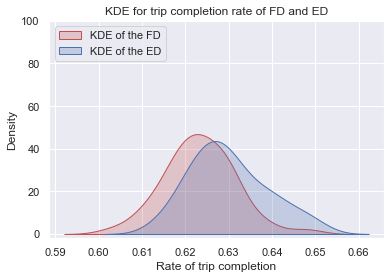

In [6]:
import pandas as pd
import seaborn as sns

sns.set()

# df = pd.DataFrame({
#     'Manhattan': X1,
#     'Euclidean': X2,})


# ax = df.plot.kde(bw_method = 0.3,title='Kernel density estimation (bandwidth = 0.3)')



#PLOT USING SEABORN
fig = sns.kdeplot(X1, shade=True, color="r",  bw_method="scott", label = "KDE of the FD")
fig = sns.kdeplot(X2, shade=True, color="b",  bw_method="scott", label = "KDE of the ED")
# plt.yscale("log")
plt.ylim((-2, 100))
plt.xlabel("Rate of trip completion")
plt.title('KDE for trip completion rate of FD and ED')
plt.legend(loc="upper left")


#SAVE FIGURE HERE

fig = fig.get_figure()
# fig.savefig("KDE_rate_complete_FD_ED.png") 



plt.show()

In [11]:
#2

from math import sqrt
from statsmodels.stats.power import TTestIndPower
import numpy as np
  
#calculation of effect size
# size of samples from 2 distributions.
n1 = 20 
n2 = 20
  
# Sample Standard deviations
sd1 = np.std(X1)
sd2 = np.std(X2)
  
# calculate the pooled standard deviation 
# (Cohen's d)
s = sqrt((((n1 - 1) * sd1**2 + (n2 - 1) * sd2**2)) / (n1 + n2 - 2))
  
# means of the samples
m1 = np.mean(X1)
m2 = np.mean(X2)
  
# Cohen'd effect size:
d = abs(m1-m2) / s
print(f'Effect size: {d}')
  
# factors for power analysis
alpha = 0.05
power = 0.8
  
# perform power analysis to find sample size 
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=d, alpha=alpha, power=power, 
                    ratio=1, alternative='two-sided')

print("d = ", d)
print("alpha = ", alpha)
print("power = ", power)

print("mean 1 =",m1)
print("mean 2 =",m2)
print("SD = ", s)
print("number of sample for each group = ",n)


#CALCULATE THE POWER OF A HYPOTHESIS TEST GIVEN n, EFFECT SIZE AND ALPHA.

from statsmodels.stats.power import TTestPower
  
power = TTestPower()
n_test = power.solve_power(nobs = 10, effect_size = d, power = None, alpha = 0.05)

print('Power: {:.3f}'.format(n_test))

Effect size: 1.042094791496664
d =  1.042094791496664
alpha =  0.05
power =  0.8
mean 1 = 0.6237866666666667
mean 2 = 0.6295866666666666
SD =  0.005565712493073604
number of sample for each group =  15.476885944977443
Power: 0.834
